In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['hiring-dataset.csv']


# Raw Data

In [2]:
raw_data = pd.read_csv('../input/hiring-dataset.csv')

In [3]:
raw_data.head()

,Job Schedule,Job Type,Location,Job Field,Application Source Type,Candidate Is Internal,Ethnicity Type,Candiate is disabled,Age (Years),iq,...,curiosity,extraversion,neuroticism,openness,self_discipline,total score,Candidate Gender,Manager Gender,Recruiter Gender,Hired
0,Full-time,Standard,South Africa,Finance,Job Board,No,Undisclosed,Not Specified,43.0,-0.373554,...,0.637316,0.823203,-0.983899,0.606679,0.364939,5.0,F,M,F,Yes
1,Full-time,Internship,Austria,Internship,Other,Yes,Undisclosed,Not Specified,24.0,1.402516,...,0.802357,1.031612,-0.686828,0.654594,-0.431925,76.0,M,F,F,Yes
2,Full-time,Internship,United Kingdom,Brand,Other,No,Undisclosed,Not Specified,NaN,0.735062,...,0.698272,0.797492,-1.171691,0.660890,0.628726,10.0,F,F,F,Yes
3,Full-time,Standard,United States,Finance,Our Web Site,Yes,Black or African American (not Hispanic or Lat...,Disability - No,39.0,-1.014683,...,0.735825,0.931424,-1.976413,0.653253,-0.395827,73.0,F,F,M,Yes
4,Full-time,Standard,United States,Sales,Our Web Site,Yes,Hispanic or Latino,Disability - No,40.0,-0.619255,...,0.709703,1.304844,-1.964447,0.520276,0.493658,1.0,M,M,F,Yes


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86644 entries, 0 to 86643
Data columns (total 31 columns):
Job Schedule               85277 non-null object
Job Type                   85948 non-null object
Location                   85948 non-null object
Job Field                  85948 non-null object
Application Source Type    85948 non-null object
Candidate Is Internal      85948 non-null object
Ethnicity Type             85948 non-null object
Candiate is disabled       85948 non-null object
Age (Years)                20323 non-null float64
iq                         27368 non-null float64
ambition                   27368 non-null float64
interpersonal              27368 non-null float64
creativity                 27368 non-null float64
fluid_iq                   27371 non-null float64
achievement                27368 non-null float64
achievement_striving       27371 non-null float64
agreeableness              27368 non-null float64
benevolence                27368 non-null float64

There are 86644 entries in the dataset with many missing values in each features.

In [5]:
total = raw_data.isnull().sum().sort_values(ascending=False)
percent = (raw_data.isnull().sum()/raw_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 10]

,Total,Missing Percent
Age (Years),66321,76.544250
creativity,59276,68.413277
benevolence,59276,68.413277
iq,59276,68.413277
achievement,59276,68.413277
ambition,59276,68.413277
neuroticism,59276,68.413277
extraversion,59276,68.413277
interpersonal,59276,68.413277
agreeableness,59276,68.413277


The missing proportions are very large for many features.

In [6]:
raw_data.describe()

,Age (Years),iq,ambition,interpersonal,creativity,fluid_iq,achievement,achievement_striving,agreeableness,benevolence,cog_flex,collectivism,core_self_evaluation,curiosity,extraversion,neuroticism,openness,self_discipline,total score
count,20323.000000,27368.000000,27368.000000,27368.000000,27368.000000,27371.000000,27368.000000,27371.000000,27368.000000,27368.000000,27371.000000,27368.000000,27371.000000,27371.000000,27368.000000,27368.000000,27371.000000,27371.000000,27371.000000
mean,30.641982,0.297109,0.740975,1.509075,1.529512,0.302110,0.315430,0.277511,0.387925,0.321714,0.585970,0.062106,0.307988,0.725955,0.754469,-1.042034,0.638291,0.238515,47.717182
std,8.444622,0.783957,0.729064,0.662521,0.138301,0.797171,0.216346,0.272021,0.234099,0.212190,0.047073,0.119199,0.309926,0.072149,0.416118,0.507240,0.096954,0.305520,30.710784
min,1.000000,-2.614939,-4.196366,-2.267396,0.938883,-2.659102,-0.517768,-1.502323,-1.151041,-0.661529,0.377709,-0.467678,-1.422635,0.400175,-1.317762,-3.254282,0.278414,-1.762617,0.000000
25%,25.000000,-0.215729,0.290104,1.108554,1.438661,-0.219372,0.166948,0.105767,0.252417,0.184425,0.552392,-0.017050,0.121826,0.680242,0.498949,-1.408975,0.571028,0.052197,21.000000
50%,29.000000,0.379562,0.795405,1.586714,1.540706,0.385958,0.321028,0.294165,0.418688,0.334719,0.590306,0.064976,0.334692,0.733886,0.791266,-1.089140,0.641289,0.265890,46.000000
75%,35.000000,0.848539,1.264931,1.996511,1.632775,0.862833,0.472063,0.472536,0.553071,0.474724,0.624077,0.144187,0.530380,0.778228,1.053828,-0.731067,0.709926,0.457413,75.000000
max,105.000000,2.908965,3.037212,3.624626,1.878631,2.958094,0.920575,1.666760,1.224118,0.939765,0.757241,0.449928,1.517902,0.923283,1.921058,1.507302,0.926295,1.411392,100.000000


* The mean value is less than the medium value in most columns.
* There is a large difference between the max value and the 75% quantile. 

It suggests that there may be outliers in the dataset.

In [7]:
for col in ['Job Schedule', 'Job Type', 'Location', 'Job Field', 'Application Source Type', 'Candidate Is Internal', 'Ethnicity Type', 'Candiate is disabled']:
    print(f"There are {raw_data[col].nunique()} unique values in {col}.")
    print(raw_data[col].value_counts())
    print()

There are 2 unique values in Job Schedule.
Full-time    58896
Part-time    26381
Name: Job Schedule, dtype: int64

There are 4 unique values in Job Type.
Standard          77224
Internship         5396
Temporary Work     3089
Graduate Job        239
Name: Job Type, dtype: int64

There are 7 unique values in Location.
United States     54468
Austria           15757
United Kingdom     5001
Australia          4421
Canada             3962
New Zealand        1327
South Africa       1012
Name: Location, dtype: int64

There are 20 unique values in Job Field.
Sales                                          13930
Operations (Production, Supply Chain, etc.)    12972
Field Marketing                                11444
Media                                           6332
Sports                                          5755
Brand                                           4619
Finance                                         3965
Off Premise Sales                               3563
Administration    

In [8]:
map_dict = {'No': 0, 'Yes': 1}
raw_data['Hired'] = raw_data['Hired'].apply(lambda x: map_dict[str(x)])

At average 1.7035% applicants are hired


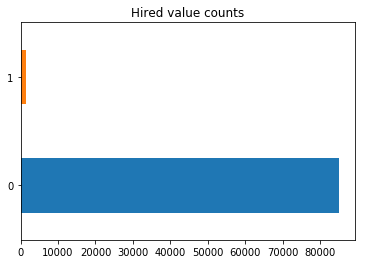

In [9]:
print(f"At average {raw_data['Hired'].mean() * 100:.4f}% applicants are hired")
raw_data['Hired'].value_counts().plot(kind='barh', title='Hired value counts')

The dataset is highly imbalanced.

# Candidate Gender

In [10]:
data_with_gender = raw_data.dropna(subset=["Candidate Gender"])
data_with_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85948 entries, 0 to 86643
Data columns (total 31 columns):
Job Schedule               85277 non-null object
Job Type                   85948 non-null object
Location                   85948 non-null object
Job Field                  85948 non-null object
Application Source Type    85948 non-null object
Candidate Is Internal      85948 non-null object
Ethnicity Type             85948 non-null object
Candiate is disabled       85948 non-null object
Age (Years)                20323 non-null float64
iq                         27305 non-null float64
ambition                   27305 non-null float64
interpersonal              27305 non-null float64
creativity                 27305 non-null float64
fluid_iq                   27308 non-null float64
achievement                27305 non-null float64
achievement_striving       27308 non-null float64
agreeableness              27305 non-null float64
benevolence                27305 non-null float64

There are 85948 entries in the dataset with Candidate Gender.

Map the categorial features into numerical

In [11]:
map_dict = {'nan': 0, 'Full-time': 1, 'Part-time': 2}
data_with_gender['Job Schedule'] = data_with_gender['Job Schedule'].apply(lambda x: map_dict[str(x)])

map_dict = {'nan': 0, 'Standard': 1, 'Internship': 2, 'Temporary Work': 3, 'Graduate Job': 4}
data_with_gender['Job Type'] = data_with_gender['Job Type'].apply(lambda x: map_dict[str(x)])

map_dict = {'nan': 0, 'United States': 1, 'Austria': 2, 'United Kingdom': 3, 'Australia': 4, 'Canada': 5, 'New Zealand': 6, 'South Africa': 7} 
data_with_gender['Location'] = data_with_gender['Location'].apply(lambda x: map_dict[str(x)])

map_dict = {'nan': 0, 'Sales': 1, 'Operations (Production, Supply Chain, etc.)': 2, 'Field Marketing': 3, 'Media': 4,
            'Sports': 5, 'Brand': 6, 'Finance': 7, 'Off Premise Sales': 8, 'Administration': 9, 'Graduate Program': 10,
            'Student Brand Manager': 11, 'Culture': 12, 'On Premise Sales': 13, 'Human Resources': 14, 'IT': 15, 
            'Internship': 16, 'Distribution': 17, 'Communications': 18, 'Legal': 19, 'Student Marketeer': 20}   
data_with_gender['Job Field'] = data_with_gender['Job Field'].apply(lambda x: map_dict[str(x)])

map_dict = {'nan': 0, 'Our Web Site': 1, 'Job Board': 2, 'Social Network': 3, 'Other': 4, 'Taleo Performance': 5, 
            'Not Specified': 0, 'News Group': 6, 'Mailing List': 7, 'Professional Associations': 8, 'Newspapers': 9, 'Direct Sourcing': 10} 
data_with_gender['Application Source Type'] = data_with_gender['Application Source Type'].apply(lambda x: map_dict[str(x)])

map_dict = {'No': 0, 'Yes': 1, 'nan': 2}
data_with_gender['Candidate Is Internal'] = data_with_gender['Candidate Is Internal'].apply(lambda x: map_dict[str(x)])

map_dict = {'nan': 0, 'Undisclosed': 0, 'White (not Hispanic or Latino)': 1, 'Hispanic or Latino': 2, 'Black or African American (not Hispanic or Latino)': 3, 
            'Asian (not Hispanic or Latino)': 4, 'American Indian or Alaska Native (not Hispanic or Latino)': 5, 'Native Hawaiian or Other Pacific Islander (not Hispanic or Latino)': 6} 
data_with_gender['Ethnicity Type'] = data_with_gender['Ethnicity Type'].apply(lambda x: map_dict[str(x)])

map_dict = {'Disability - No': 0, 'Disability - Yes': 1, 'Not Specified': 2, 'Undisclosed': 2, 'nan': 2}
data_with_gender['Candiate is disabled'] = data_with_gender['Candiate is disabled'].apply(lambda x: map_dict[str(x)])

In [12]:
map_dict = {'F': 0, 'M': 1}
data_with_gender['Candidate Gender'] = data_with_gender['Candidate Gender'].apply(lambda x: map_dict[str(x)])
data_with_gender['Manager Gender'] = data_with_gender['Manager Gender'].apply(lambda x: map_dict[str(x)])
data_with_gender['Recruiter Gender'] = data_with_gender['Recruiter Gender'].apply(lambda x: map_dict[str(x)])

In [13]:
data_with_gender.head()

,Job Schedule,Job Type,Location,Job Field,Application Source Type,Candidate Is Internal,Ethnicity Type,Candiate is disabled,Age (Years),iq,...,curiosity,extraversion,neuroticism,openness,self_discipline,total score,Candidate Gender,Manager Gender,Recruiter Gender,Hired
0,1,1,7,7,2,0,0,2,43.0,-0.373554,...,0.637316,0.823203,-0.983899,0.606679,0.364939,5.0,0,1,0,1
1,1,2,2,16,4,1,0,2,24.0,1.402516,...,0.802357,1.031612,-0.686828,0.654594,-0.431925,76.0,1,0,0,1
2,1,2,3,6,4,0,0,2,NaN,0.735062,...,0.698272,0.797492,-1.171691,0.660890,0.628726,10.0,0,0,0,1
3,1,1,1,7,1,1,3,0,39.0,-1.014683,...,0.735825,0.931424,-1.976413,0.653253,-0.395827,73.0,0,0,1,1
4,1,1,1,1,1,1,2,0,40.0,-0.619255,...,0.709703,1.304844,-1.964447,0.520276,0.493658,1.0,1,1,0,1


In [14]:
print(f"Overall {data_with_gender['Candidate Gender'].mean() * 100:.4f}% Candidates are Male")

Overall 63.7013% Candidates are Male


In [15]:
data_with_gender.groupby(['Candidate Gender','Hired'])['Hired'].count()

Candidate Gender  Hired
0                 0        30897
                  1          301
1                 0        54271
                  1          479
Name: Hired, dtype: int64

Overall 63.7013% Candidates are Male


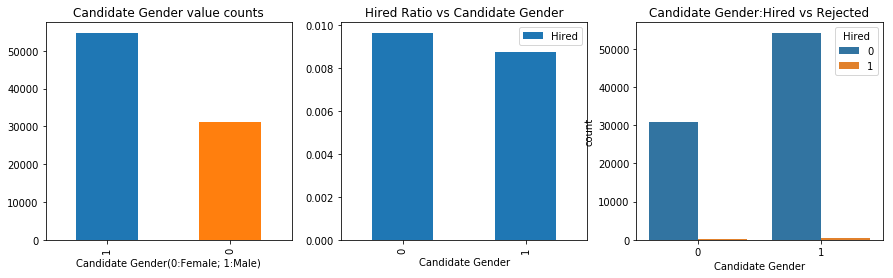

In [16]:
print(f"Overall {data_with_gender['Candidate Gender'].mean() * 100:.4f}% Candidates are Male")
f,ax=plt.subplots(1, 3, figsize=(15,4))
data_with_gender['Candidate Gender'].value_counts().plot(kind='bar', title='Candidate Gender value counts', ax=ax[0])
ax[0].set_xlabel('Candidate Gender(0:Female; 1:Male)')
data_with_gender[['Candidate Gender', 'Hired']].groupby(['Candidate Gender']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Hired Ratio vs Candidate Gender')
sns.countplot('Candidate Gender', hue='Hired', data=data_with_gender,ax=ax[2])
ax[2].set_title('Candidate Gender:Hired vs Rejected')
plt.show()

### Candidate Gender & Manager Gender & Recruiter Gender

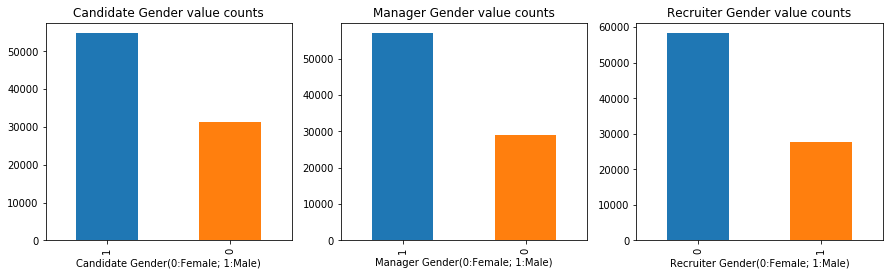

In [17]:
f,ax=plt.subplots(1, 3, figsize=(15,4))
data_with_gender['Candidate Gender'].value_counts().plot(kind='bar', title='Candidate Gender value counts', ax=ax[0])
ax[0].set_xlabel('Candidate Gender(0:Female; 1:Male)')
data_with_gender['Manager Gender'].value_counts().plot(kind='bar', title='Manager Gender value counts', ax=ax[1])
ax[1].set_xlabel('Manager Gender(0:Female; 1:Male)')
data_with_gender['Recruiter Gender'].value_counts().plot(kind='bar', title='Recruiter Gender value counts', ax=ax[2])
ax[2].set_xlabel('Recruiter Gender(0:Female; 1:Male)')
plt.show()

In [18]:
pd.crosstab([data_with_gender['Recruiter Gender'], data_with_gender['Manager Gender']],[data_with_gender['Candidate Gender'], data_with_gender['Hired']],margins=True).style.background_gradient(cmap='summer_r')

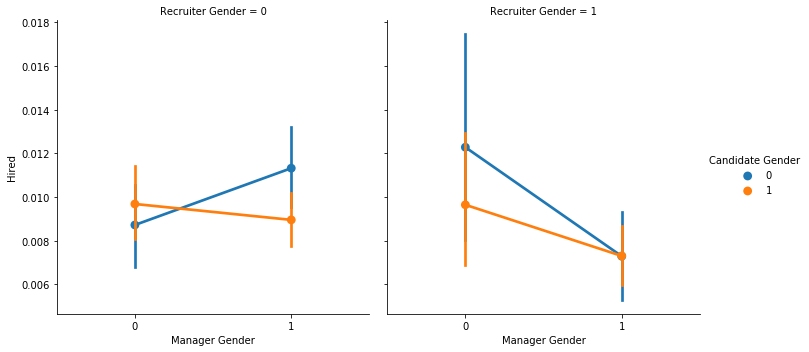

In [19]:
sns.factorplot('Manager Gender', 'Hired', hue='Candidate Gender', col='Recruiter Gender', data=data_with_gender)
plt.show()

* The hired chance for men is always higher with a female manager or a female recruiter.
* The hired chance for women is higher when the recruiter and manager are of different sex.

# Ethnicity Type

In [20]:
data_with_race = raw_data.dropna(subset=["Ethnicity Type"])
data_with_race = data_with_race[~data_with_race['Ethnicity Type'].isin(['Undisclosed'])]
data_with_race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43725 entries, 3 to 86642
Data columns (total 31 columns):
Job Schedule               43724 non-null object
Job Type                   43725 non-null object
Location                   43725 non-null object
Job Field                  43725 non-null object
Application Source Type    43725 non-null object
Candidate Is Internal      43725 non-null object
Ethnicity Type             43725 non-null object
Candiate is disabled       43725 non-null object
Age (Years)                3501 non-null float64
iq                         11746 non-null float64
ambition                   11746 non-null float64
interpersonal              11746 non-null float64
creativity                 11746 non-null float64
fluid_iq                   11748 non-null float64
achievement                11746 non-null float64
achievement_striving       11748 non-null float64
agreeableness              11746 non-null float64
benevolence                11746 non-null float64


There are 43725 entries in the dataset with specific Ethnicity Type.

In [21]:
pd.crosstab(data_with_race['Ethnicity Type'],data_with_race['Hired'],margins=True).style.background_gradient(cmap='summer_r')

Hired,0,1,All
Ethnicity Type,,,
American Indian or Alaska Native (not Hispanic or Latino),289,3,292
Asian (not Hispanic or Latino),3746,16,3762
Black or African American (not Hispanic or Latino),6939,14,6953
Hispanic or Latino,8391,44,8435
Native Hawaiian or Other Pacific Islander (not Hispanic or Latino),221,0,221
White (not Hispanic or Latino),23912,150,24062
All,43498,227,43725


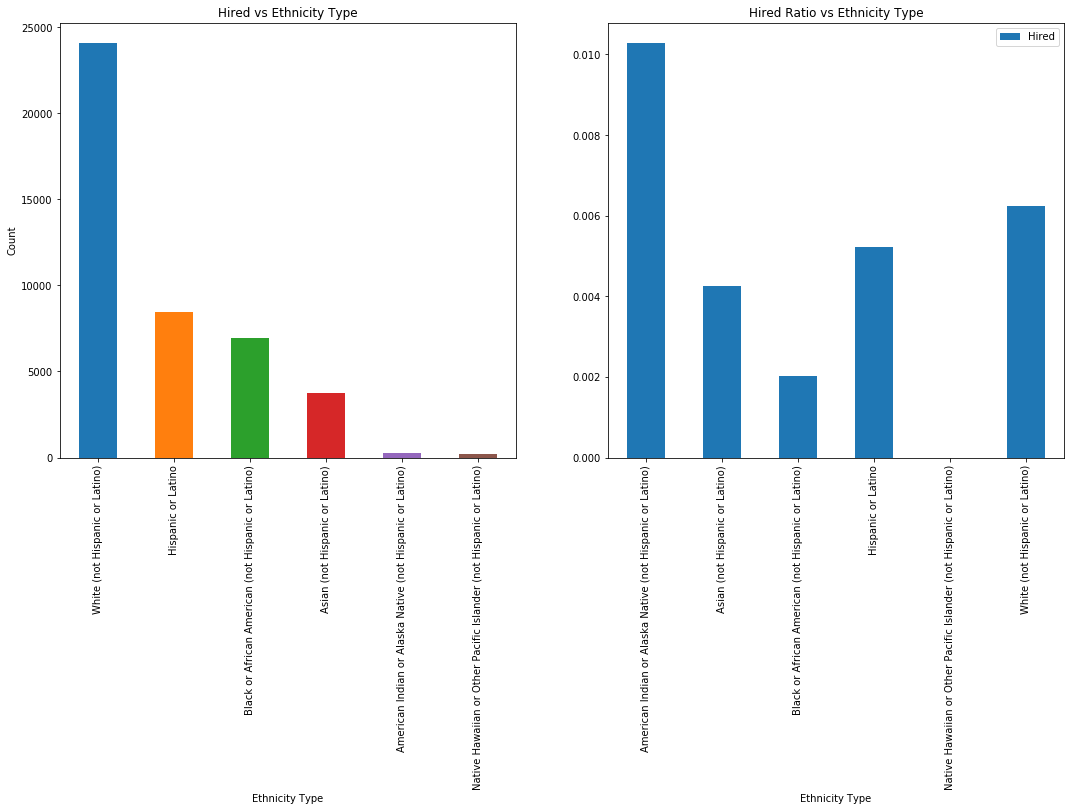

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_with_race['Ethnicity Type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Hired vs Ethnicity Type')
ax[0].set_xlabel('Ethnicity Type')
ax[0].set_ylabel('Count')
data_with_race[['Ethnicity Type','Hired']].groupby(['Ethnicity Type']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Hired Ratio vs Ethnicity Type')
plt.show()

* Although the hired ratio of 'American Indian or Alaska Native (not Hispanic or Latino)' is high, it is probably because of the small total number of the group. 
* The 'White (not Hispanic or Latino)' group could be treated as privileged group based on its large sample size and high hired ratio.

### Gender & Race

In [23]:
data_with_gr = data_with_gender.dropna(subset=["Ethnicity Type"])
data_with_gr = data_with_gr[~data_with_gr['Ethnicity Type'].isin([0])]

In [24]:
print(f"There are {data_with_gr['Ethnicity Type'].nunique()} unique values in {'Ethnicity Type'}.")
print(data_with_gr["Ethnicity Type"].value_counts())

There are 6 unique values in Ethnicity Type.
1    24062
2     8435
3     6953
4     3762
5      292
6      221
Name: Ethnicity Type, dtype: int64


'White (not Hispanic or Latino)': 1

'Hispanic or Latino': 2

'Black or African American (not Hispanic or Latino)': 3

'Asian (not Hispanic or Latino)': 4

'American Indian or Alaska Native (not Hispanic or Latino)': 5

'Native Hawaiian or Other Pacific Islander (not Hispanic or Latino)': 6

In [25]:
pd.crosstab([data_with_gr['Ethnicity Type'], data_with_gr['Hired']],data_with_gr['Candidate Gender'],margins=True).style.background_gradient(cmap='summer_r')

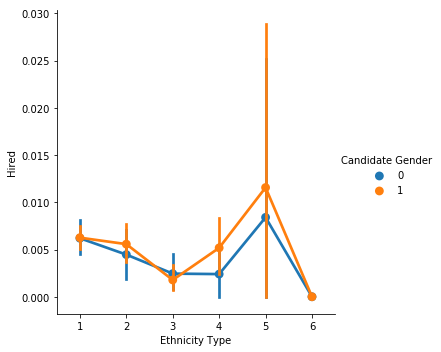

In [26]:
sns.factorplot('Ethnicity Type', 'Hired', hue='Candidate Gender', data=data_with_gr)
plt.show()

# Location

In [27]:
data_with_location = raw_data.dropna(subset=["Location"])
data_with_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85948 entries, 0 to 86643
Data columns (total 31 columns):
Job Schedule               85277 non-null object
Job Type                   85948 non-null object
Location                   85948 non-null object
Job Field                  85948 non-null object
Application Source Type    85948 non-null object
Candidate Is Internal      85948 non-null object
Ethnicity Type             85948 non-null object
Candiate is disabled       85948 non-null object
Age (Years)                20323 non-null float64
iq                         27305 non-null float64
ambition                   27305 non-null float64
interpersonal              27305 non-null float64
creativity                 27305 non-null float64
fluid_iq                   27308 non-null float64
achievement                27305 non-null float64
achievement_striving       27308 non-null float64
agreeableness              27305 non-null float64
benevolence                27305 non-null float64

There are 85948 entries in the dataset with Location.

In [28]:
pd.crosstab(data_with_location['Location'],data_with_location['Hired'],margins=True).style.background_gradient(cmap='summer_r')

Hired,0,1,All
Location,,,
Australia,4387,34,4421
Austria,15370,387,15757
Canada,3950,12,3962
New Zealand,1320,7,1327
South Africa,1009,3,1012
United Kingdom,4977,24,5001
United States,54155,313,54468
All,85168,780,85948


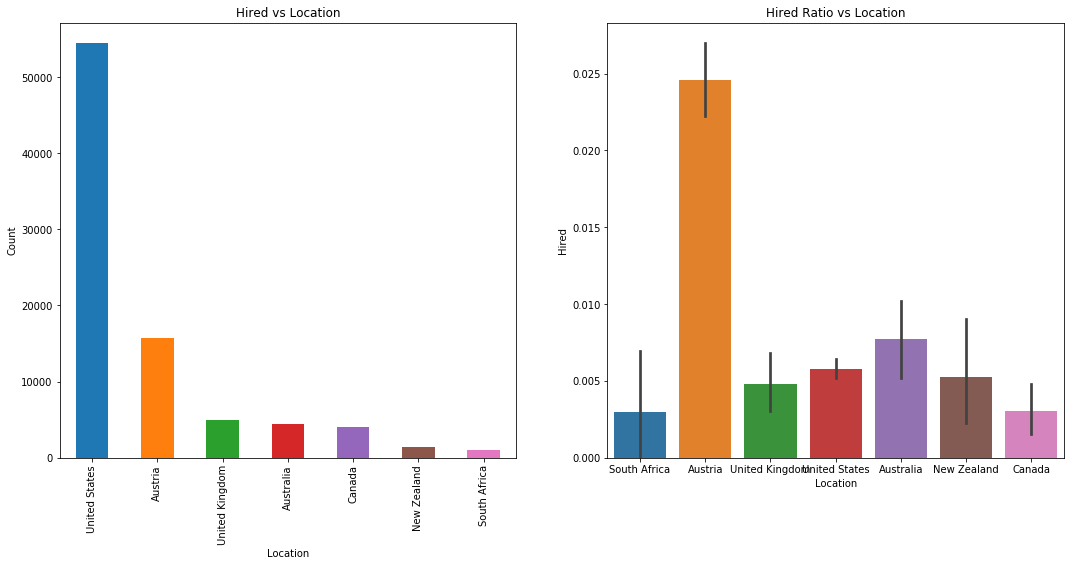

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_with_location['Location'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Hired vs Location')
ax[0].set_xlabel('Location')
ax[0].set_ylabel('Count')
sns.barplot('Location','Hired',data=data_with_location,ax=ax[1])
ax[1].set_title('Hired Ratio vs Location')
plt.show()

### Gender & Location

In [30]:
print(f"There are {data_with_gender['Location'].nunique()} unique values in {'Location'}.")
print(data_with_gender["Location"].value_counts())

There are 7 unique values in Location.
1    54468
2    15757
3     5001
4     4421
5     3962
6     1327
7     1012
Name: Location, dtype: int64


'United States': 1

'Austria': 2

'United Kingdom': 3

'Australia': 4

'Canada': 5

'New Zealand': 6

'South Africa': 7

In [31]:
pd.crosstab([data_with_gender['Location'], data_with_gender['Hired']],data_with_gender['Candidate Gender'],margins=True).style.background_gradient(cmap='summer_r')

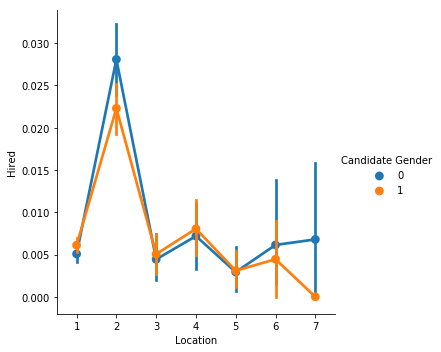

In [32]:
sns.factorplot('Location', 'Hired', hue='Candidate Gender', data=data_with_gender)
plt.show()

# Age

In [33]:
data_with_age = raw_data.dropna(subset=["Age (Years)"])
data_with_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20323 entries, 0 to 86640
Data columns (total 31 columns):
Job Schedule               20282 non-null object
Job Type                   20323 non-null object
Location                   20323 non-null object
Job Field                  20323 non-null object
Application Source Type    20323 non-null object
Candidate Is Internal      20323 non-null object
Ethnicity Type             20323 non-null object
Candiate is disabled       20323 non-null object
Age (Years)                20323 non-null float64
iq                         8563 non-null float64
ambition                   8563 non-null float64
interpersonal              8563 non-null float64
creativity                 8563 non-null float64
fluid_iq                   8564 non-null float64
achievement                8563 non-null float64
achievement_striving       8564 non-null float64
agreeableness              8563 non-null float64
benevolence                8563 non-null float64
cog_flex

There are 20323 entries in the dataset with Age.

In [34]:
print('Oldest candidate:',data_with_age["Age (Years)"].max(),'years old')
print('Youngest candidate:',data_with_age["Age (Years)"].min(),'years old')
print('Average age:',data_with_age["Age (Years)"].mean(),'years old')

Oldest candidate: 105.0 years old
Youngest candidate: 1.0 years old
Average age: 30.641981990847807 years old


In [35]:
data_with_age[data_with_age["Age (Years)"]==1.0]

,Job Schedule,Job Type,Location,Job Field,Application Source Type,Candidate Is Internal,Ethnicity Type,Candiate is disabled,Age (Years),iq,...,curiosity,extraversion,neuroticism,openness,self_discipline,total score,Candidate Gender,Manager Gender,Recruiter Gender,Hired
921,Full-time,Standard,Austria,IT,Taleo Performance,Yes,Undisclosed,Not Specified,1.0,0.910869,...,0.734722,1.17121,-1.661041,0.731799,0.526697,99.0,M,F,F,1
1022,Full-time,Standard,Austria,"Operations (Production, Supply Chain, etc.)",Other,Yes,Undisclosed,Not Specified,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,F,F,M,1
38288,Full-time,Standard,Austria,On Premise Sales,Other,Yes,Undisclosed,Not Specified,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,M,M,M,0


The youngest age is strange in practice. And two of them among three are hired.

In [36]:
print(f"There are {data_with_age['Age (Years)'].nunique()} unique values in {'Age (Years)'}.")
print(data_with_age["Age (Years)"].value_counts())

There are 61 unique values in Age (Years).
25.0     1426
26.0     1390
24.0     1321
27.0     1251
23.0     1250
28.0     1202
29.0     1097
22.0     1000
30.0      950
31.0      884
32.0      768
33.0      701
34.0      640
21.0      604
35.0      570
36.0      496
37.0      486
38.0      442
39.0      372
40.0      343
20.0      338
41.0      263
42.0      253
44.0      217
43.0      208
45.0      205
46.0      169
47.0      160
48.0      145
50.0      143
         ... 
19.0      111
51.0      109
52.0      102
3.0        82
54.0       73
53.0       67
55.0       61
56.0       55
57.0       45
58.0       38
2.0        27
60.0       27
59.0       17
61.0       14
18.0       13
62.0       11
63.0        9
17.0        6
16.0        5
64.0        4
65.0        4
1.0         3
67.0        2
70.0        2
68.0        1
73.0        1
105.0       1
102.0       1
101.0       1
71.0        1
Name: Age (Years), Length: 61, dtype: int64


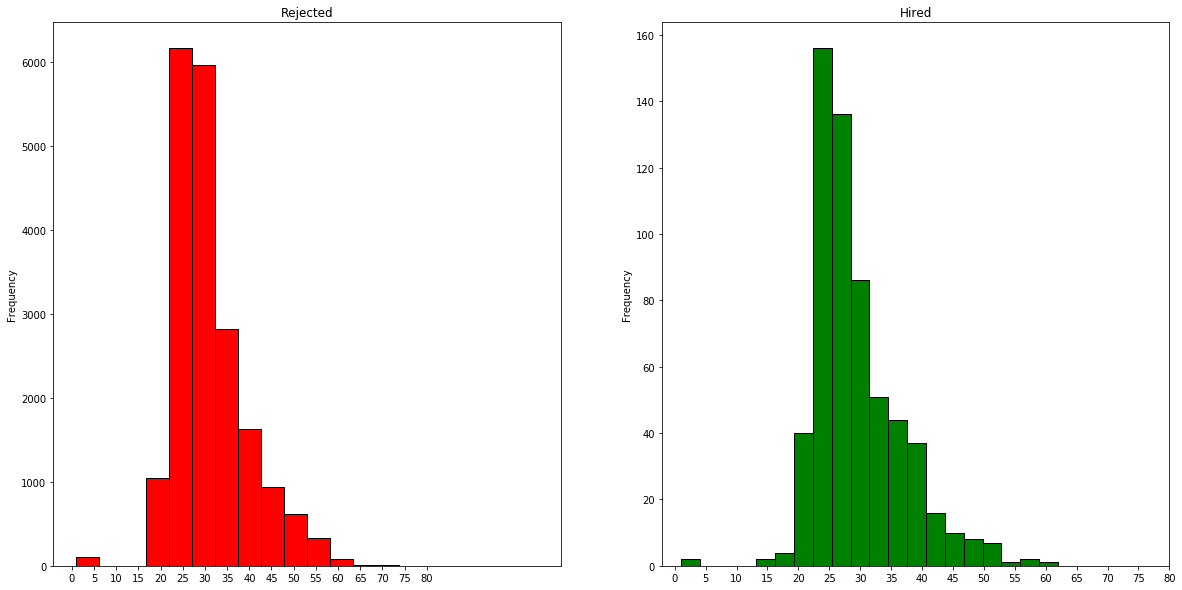

In [37]:
data_with_age["Age (Years)"]

f,ax=plt.subplots(1,2,figsize=(20,10))
data_with_age[data_with_age['Hired']==0]['Age (Years)'].plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Rejected')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data_with_age[data_with_age['Hired']==1]['Age (Years)'].plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Hired')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Gender & Age & Ethnicity Type & Location

In [38]:
data_with_gra = data_with_gr.dropna(subset=["Age (Years)"])

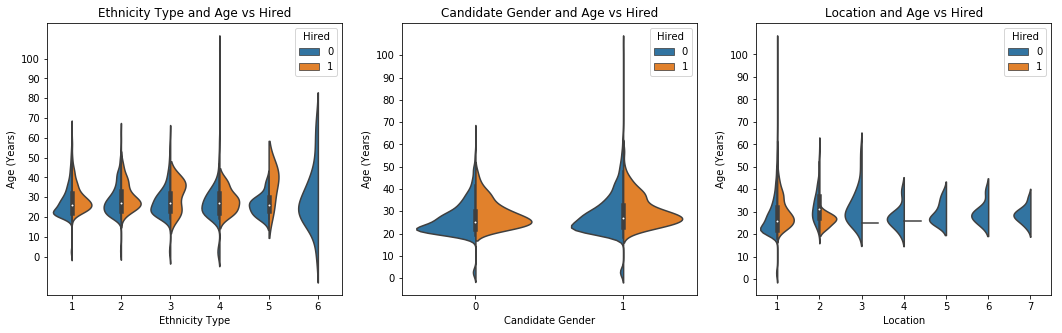

In [39]:
f,ax=plt.subplots(1,3,figsize=(18,5))
sns.violinplot("Ethnicity Type","Age (Years)", hue="Hired", data=data_with_gra,split=True,ax=ax[0])
ax[0].set_title('Ethnicity Type and Age vs Hired')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Candidate Gender","Age (Years)", hue="Hired", data=data_with_gra,split=True,ax=ax[1])
ax[1].set_title('Candidate Gender and Age vs Hired')
ax[1].set_yticks(range(0,110,10))
sns.violinplot("Location","Age (Years)", hue="Hired", data=data_with_gra,split=True,ax=ax[2])
ax[2].set_title('Location and Age vs Hired')
ax[2].set_yticks(range(0,110,10))
plt.show()

### transfer the feature age to 4 bins according to the 25%, 50%, 75% quantiles

In [40]:
data_with_age['Age_bin']=np.nan
age_bin = [105, 35, 29, 25]
bin_name = ['36-105', '30-35', '26-29', '0-25']
for i in range(4):
    data_with_age.loc[data_with_age['Age (Years)'] <= age_bin[i], 'Age_bin'] = bin_name[i]

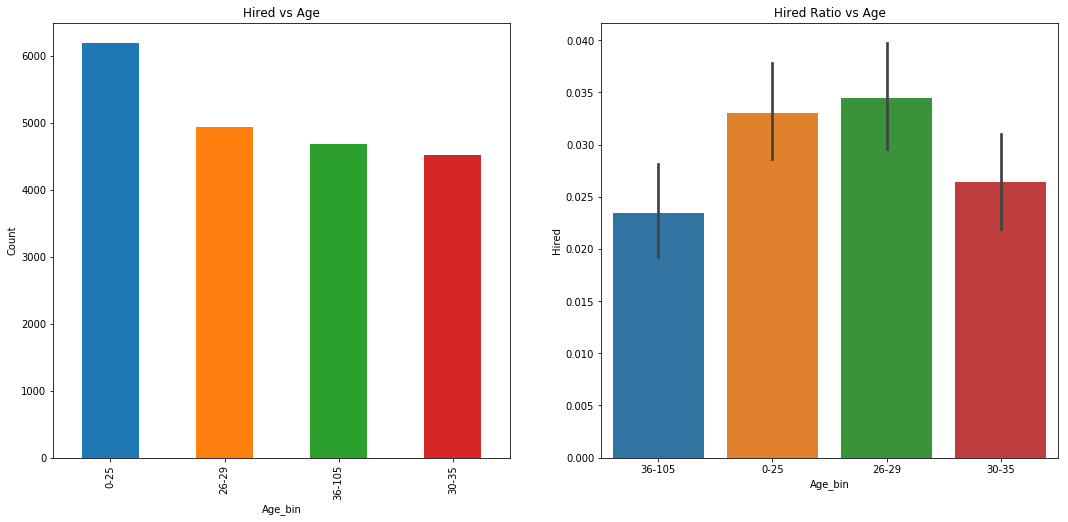

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_with_age['Age_bin'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Hired vs Age')
ax[0].set_xlabel('Age_bin')
ax[0].set_ylabel('Count')
sns.barplot('Age_bin','Hired',data=data_with_age,ax=ax[1])
ax[1].set_title('Hired Ratio vs Age')
plt.show()

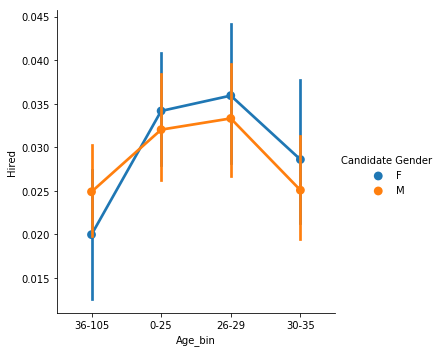

In [42]:
sns.catplot('Age_bin','Hired',hue='Candidate Gender',kind='point',data=data_with_age);

# Considering only the data which could be used to build the model (feature inputs are not null)

In [43]:
data_with_scores = data_with_gender.dropna(subset=["iq", "ambition", "interpersonal", "creativity", "fluid_iq", "achievement", "achievement_striving", "agreeableness", "benevolence", "cog_flex", "collectivism", "core_self_evaluation", "curiosity", "extraversion", "neuroticism", "openness", "self_discipline", "total score"])
data_with_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27305 entries, 0 to 86266
Data columns (total 31 columns):
Job Schedule               27305 non-null int64
Job Type                   27305 non-null int64
Location                   27305 non-null int64
Job Field                  27305 non-null int64
Application Source Type    27305 non-null int64
Candidate Is Internal      27305 non-null int64
Ethnicity Type             27305 non-null int64
Candiate is disabled       27305 non-null int64
Age (Years)                8563 non-null float64
iq                         27305 non-null float64
ambition                   27305 non-null float64
interpersonal              27305 non-null float64
creativity                 27305 non-null float64
fluid_iq                   27305 non-null float64
achievement                27305 non-null float64
achievement_striving       27305 non-null float64
agreeableness              27305 non-null float64
benevolence                27305 non-null float64
cog_flex

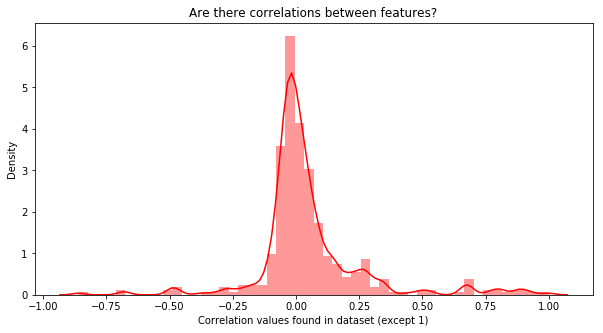

In [44]:
train_correlations = data_with_scores.drop(["Hired"], axis=1).corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

plt.figure(figsize=(10,5))
sns.distplot(train_correlations, color="Red")
plt.xlabel("Correlation values found in dataset (except 1)")
plt.ylabel("Density")
plt.title("Are there correlations between features?"); 

There are some significant correlations between features.

In [45]:
features = data_with_scores.columns.values[9:30]
correlations = data_with_scores[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)

,level_0,level_1,0
410,interpersonal,extraversion,0.882523
411,extraversion,interpersonal,0.882523
412,ambition,achievement_striving,0.892323
413,achievement_striving,ambition,0.892323
414,ambition,core_self_evaluation,0.905436
415,core_self_evaluation,ambition,0.905436
416,self_discipline,ambition,0.934611
417,ambition,self_discipline,0.934611
418,fluid_iq,iq,1.000000
419,iq,fluid_iq,1.000000


Many features are highly correlated.

In [46]:
data_with_scores['Hired'].value_counts()

0    26945
1      360
Name: Hired, dtype: int64

In [47]:
def plot_feature_distribution(df1, df2, label1, label2, features, rows, columns):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(rows,columns,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(rows,columns,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

### Density plot of the features for Male(1) and Female(0)

<Figure size 432x288 with 0 Axes>

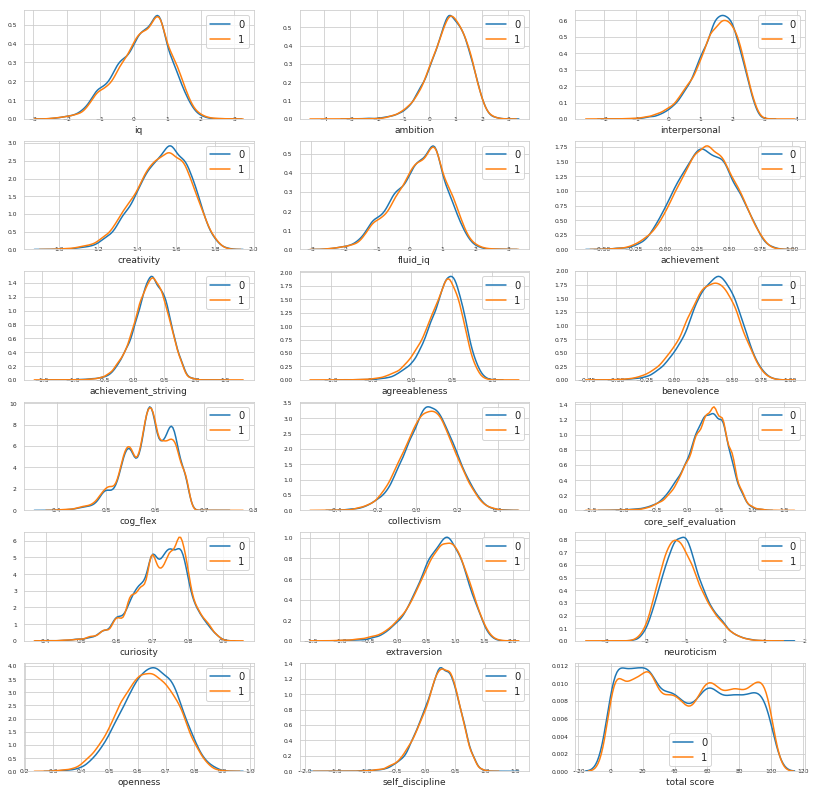

In [48]:
t0 = data_with_scores.loc[data_with_scores['Candidate Gender'] == 0]
t1 = data_with_scores.loc[data_with_scores['Candidate Gender'] == 1]
features = data_with_scores.columns.values[9:27]
plot_feature_distribution(t0, t1, '0', '1', features, 6, 3)

In [49]:
data_with_scores = data_with_scores.drop(['Job Schedule', 'Job Type', 'Location', 'Job Field', 'Application Source Type', 
                   'Candidate Is Internal', 'Ethnicity Type', 'Candiate is disabled', 'Age (Years)',
                   'Candidate Gender', 'Manager Gender', 'Recruiter Gender'], axis=1)

In [50]:
random_data = data_with_scores.sample(frac=1)

hired = random_data.loc[random_data['Hired'] == 1]
rejected = random_data.loc[random_data['Hired'] == 0][:360]

new_data = pd.concat([hired, rejected])

subsample = new_data.sample(frac=1, random_state=12)

Text(0.5, 1.0, 'correlation plot of the data after random undersampling')

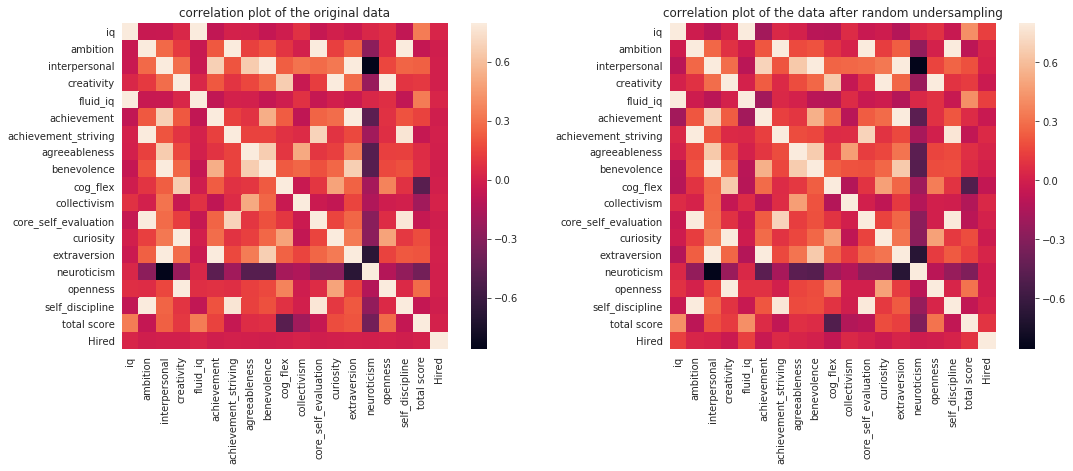

In [51]:
corrmat = data_with_scores.corr()
f, ax = plt.subplots(1,2,figsize=(18,6))
sns.heatmap(corrmat, vmax=.8, square=True, ax=ax[0])
ax[0].set_title('correlation plot of the original data')

sub_corrmat = subsample.corr()
sns.heatmap(sub_corrmat, vmax=.8, square=True, ax=ax[1])
ax[1].set_title('correlation plot of the data after random undersampling')

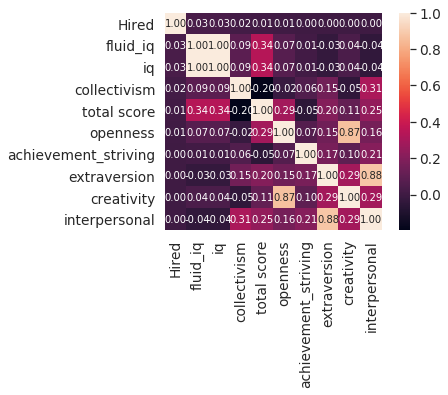

In [52]:
k = 10
cols = corrmat.nlargest(k, 'Hired')['Hired'].index
cm = np.corrcoef(data_with_scores[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

None of the features are obviously correalated with the target.

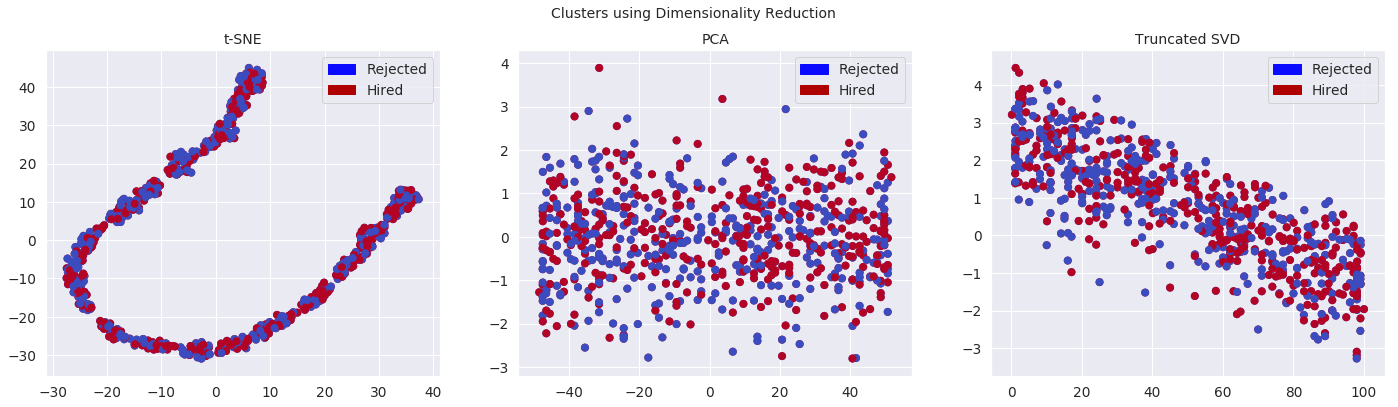

In [53]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

X = subsample.drop(['Hired'], axis=1)
y = subsample['Hired']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Rejected')
red_patch = mpatches.Patch(color='#AF0000', label='Hired')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Rejected', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Hired', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Rejected', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Hired', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])


# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Rejected', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Hired', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

The samples are not separable. Predictive models may not perform well in this binary classification

In [54]:
data_with_scores_hired = data_with_scores[data_with_scores['Hired']==1]
data_with_scores_rejected = data_with_scores[data_with_scores['Hired']==0]

### the description of the hired candidates

In [55]:
stat_hired = data_with_scores_hired.describe()
stat_hired

,iq,ambition,interpersonal,creativity,fluid_iq,achievement,achievement_striving,agreeableness,benevolence,cog_flex,collectivism,core_self_evaluation,curiosity,extraversion,neuroticism,openness,self_discipline,total score,Hired
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.0
mean,0.519428,0.707407,1.513382,1.531562,0.528201,0.307018,0.285355,0.389320,0.309264,0.585119,0.078286,0.281883,0.724912,0.765051,-1.048014,0.642541,0.219261,51.269444,1.0
std,0.724877,0.716729,0.586994,0.142220,0.737119,0.209372,0.263158,0.235261,0.199101,0.048023,0.114072,0.312460,0.069528,0.374569,0.449698,0.101842,0.292594,30.838733,0.0
min,-1.458495,-1.659410,-0.821621,1.074831,-1.483127,-0.277284,-0.555909,-0.522499,-0.432743,0.415874,-0.291327,-0.896970,0.481759,-0.743340,-2.113901,0.315486,-0.805230,0.000000,1.0
25%,0.038805,0.296382,1.148802,1.433867,0.039460,0.158746,0.128222,0.252838,0.192732,0.553287,0.003532,0.091210,0.685444,0.530512,-1.365439,0.574266,0.049077,22.000000,1.0
50%,0.644654,0.782558,1.565029,1.548160,0.655542,0.319709,0.298702,0.416319,0.320071,0.586856,0.078869,0.302690,0.734229,0.791218,-1.060373,0.644504,0.251774,57.000000,1.0
75%,1.050881,1.231885,1.961488,1.633080,1.068629,0.460884,0.474316,0.549766,0.452997,0.626516,0.156516,0.523213,0.775741,1.018512,-0.761139,0.718271,0.428460,78.000000,1.0
max,1.996525,2.177106,2.776228,1.849000,2.030244,0.820642,0.910416,1.011804,0.784520,0.664398,0.373518,0.959137,0.857547,1.706593,0.341923,0.864279,0.813149,100.000000,1.0


### the description of the rejected candidates

In [56]:
stat_rejected = data_with_scores_rejected.describe()
stat_rejected

,iq,ambition,interpersonal,creativity,fluid_iq,achievement,achievement_striving,agreeableness,benevolence,cog_flex,collectivism,core_self_evaluation,curiosity,extraversion,neuroticism,openness,self_discipline,total score,Hired
count,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.000000,26945.0
mean,0.293777,0.741762,1.508983,1.529548,0.298738,0.315586,0.277478,0.387875,0.321962,0.586008,0.061840,0.308476,0.726008,0.754257,-1.041886,0.638257,0.238963,47.655372,0.0
std,0.784546,0.729077,0.663605,0.138267,0.797796,0.216448,0.272114,0.234164,0.212387,0.047071,0.119263,0.309832,0.072191,0.416703,0.507995,0.096888,0.305643,30.703633,0.0
min,-2.614939,-4.196366,-2.267396,0.938883,-2.659102,-0.517768,-1.502323,-1.151041,-0.661529,0.377709,-0.467678,-1.422635,0.400175,-1.317762,-3.254282,0.278414,-1.762617,0.000000,0.0
25%,-0.219276,0.290763,1.107424,1.438773,-0.222979,0.167117,0.105595,0.252284,0.184453,0.552443,-0.017391,0.121826,0.680333,0.498447,-1.409462,0.571048,0.052865,21.000000,0.0
50%,0.375906,0.795933,1.587127,1.540634,0.382254,0.321139,0.293945,0.418801,0.335138,0.590342,0.064722,0.335166,0.733886,0.791239,-1.089427,0.641281,0.266670,46.000000,0.0
75%,0.846437,1.266593,1.996971,1.632826,0.860732,0.472293,0.472536,0.553247,0.475209,0.624077,0.143959,0.531112,0.778228,1.054342,-0.729965,0.709893,0.457826,75.000000,0.0
max,2.908965,3.037212,3.624626,1.878631,2.958094,0.920575,1.666760,1.224118,0.939765,0.757241,0.449928,1.517902,0.923283,1.921058,1.507302,0.926295,1.411392,100.000000,0.0


### density plot of the features

<Figure size 432x288 with 0 Axes>

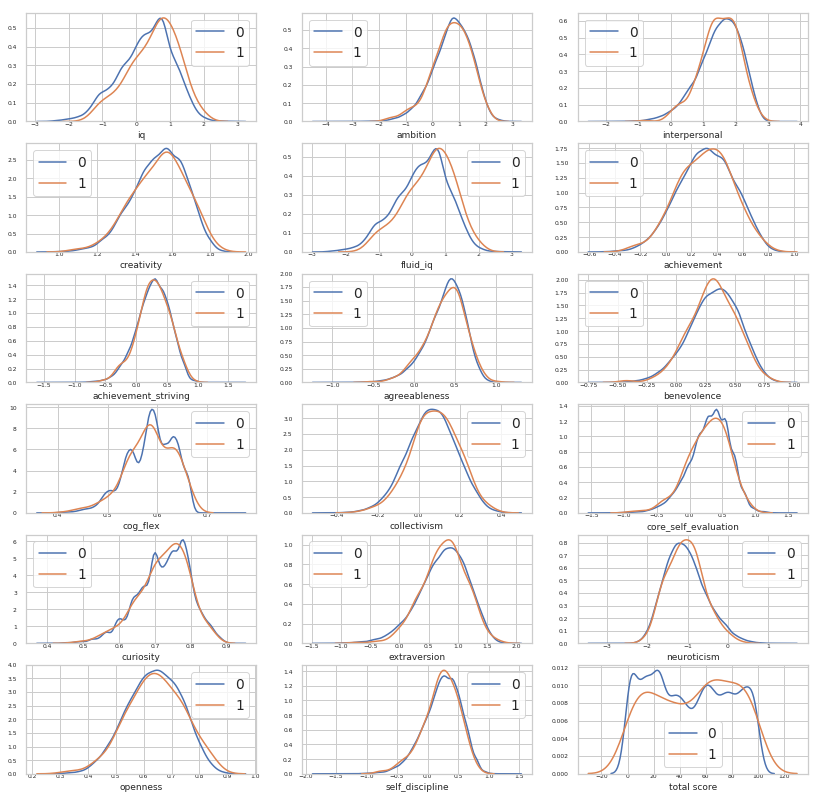

In [57]:
t0 = data_with_scores.loc[data_with_scores['Hired'] == 0]
t1 = data_with_scores.loc[data_with_scores['Hired'] == 1]
features = data_with_scores.columns.values[:-1]
plot_feature_distribution(t0, t1, '0', '1', features, 6, 3)

### boxplot of the features

<Figure size 432x288 with 0 Axes>

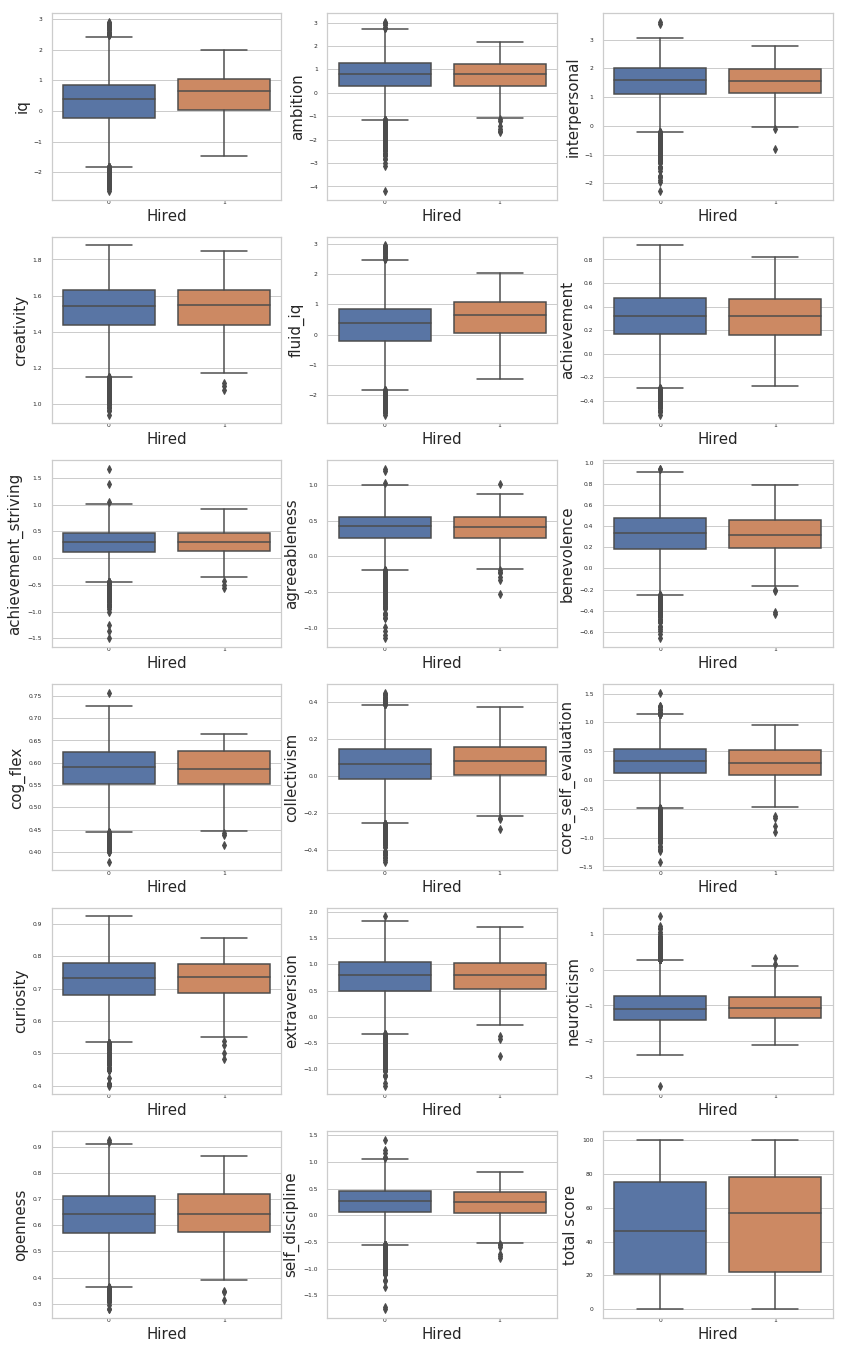

In [58]:
features = data_with_scores.columns.values[:-1]
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6, 3, figsize=(14,24))

for feature in features:
    i += 1
    plt.subplot(6, 3, i)
    sns.boxplot(x="Hired", y=feature, data=data_with_scores)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
    plt.tick_params(axis='y', which='major', labelsize=6)
plt.show()
    

### error bar of the features

<Figure size 432x288 with 0 Axes>

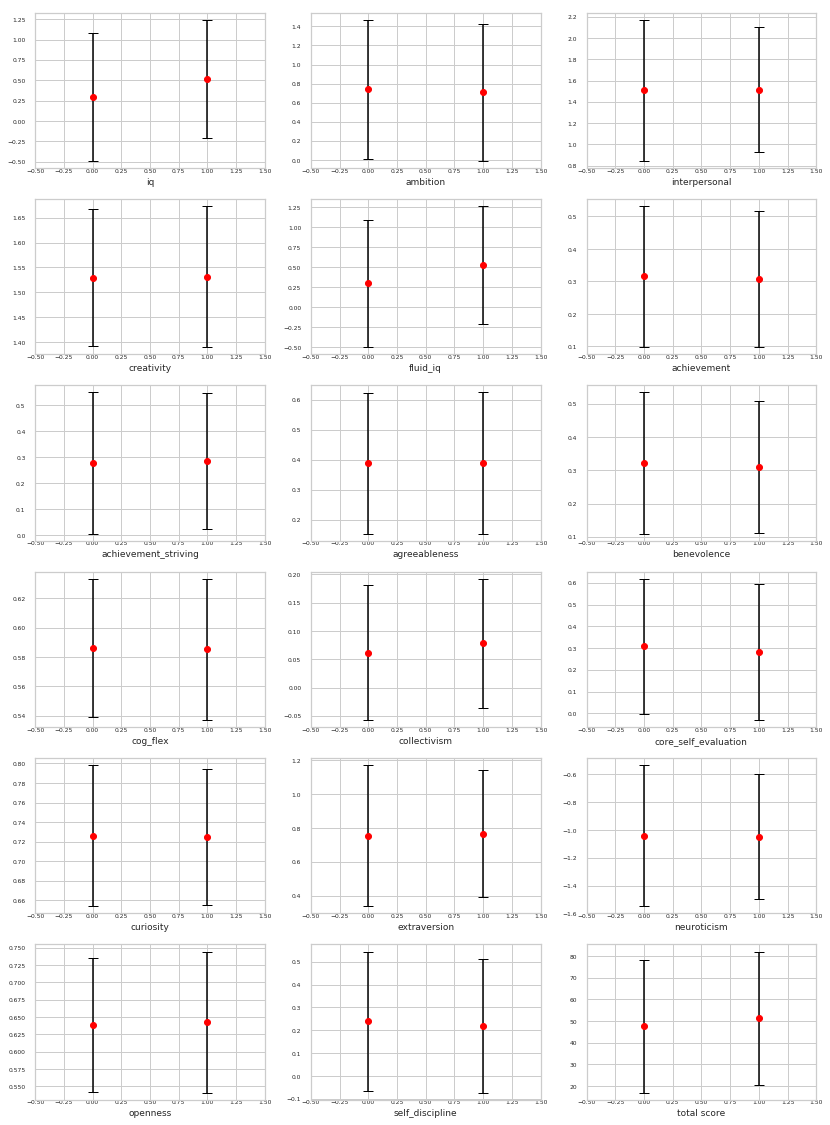

In [59]:
features = data_with_scores.columns.values[:-1]
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6, 3, figsize=(14,20))
xlims = (-0.5, 1.5)

for feature in features:
    i += 1
    plt.subplot(6, 3, i)
    plt.errorbar(1, stat_hired[feature]['mean'], yerr=stat_hired[feature]['std'], color='red', marker='o', capsize=5, capthick=1, ecolor='black')
    plt.errorbar(0, stat_rejected[feature]['mean'], yerr=stat_rejected[feature]['std'], color='red', marker='o', capsize=5, capthick=1, ecolor='black')
    plt.xlabel(feature, fontsize=9)
    plt.xlim(xlims)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
    plt.tick_params(axis='y', which='major', labelsize=6)
plt.show()
